# MPG Regression Problem

## importing all modules

In [1]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import scale
#from sklearn import cross_validation
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error

import plotly   
from plotly.graph_objs import *
import plotly.offline as plot
import plotly.graph_objs as go
plot.offline.init_notebook_mode(connected=True)

# for OLS
import statsmodels.formula.api as sm
import statsmodels.stats.diagnostic as sms

## importing files

In [27]:
Regression_Data = pd.read_csv('Ex04_Mpg_Regression.csv') 
Regression_Data['horsepower'] = pd.to_numeric(Regression_Data.horsepower, errors=np.NaN)
Regression_Data.dropna(axis = 0, inplace=True)
Regression_Data = Regression_Data.drop('carname',axis = 1)
Regression_Data = Regression_Data.loc[:, (Regression_Data != 0).any(axis=0)]

## Description of imported data

In [28]:
Regression_Data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,23.459847,5.465473,194.124041,104.404092,2976.237852,15.550384,75.994885,1.578005
std,7.810128,1.703152,104.622462,38.518732,850.071941,2.756557,3.675975,0.806020
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2224.500000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,93.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,264.500000,125.000000,3616.500000,17.050000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Correlation details

In [29]:
Regression_Data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
mpg,1.000000,-0.777643,-0.804899,-0.778165,-0.832065,0.422188,0.579960,0.564652
cylinders,-0.777643,1.000000,0.950824,0.843315,0.898146,-0.502281,-0.341595,-0.568186
displacement,-0.804899,0.950824,1.000000,0.897265,0.933129,-0.542209,-0.367163,-0.613875
horsepower,-0.778165,0.843315,0.897265,1.000000,0.864397,-0.688857,-0.415239,-0.454509
weight,-0.832065,0.898146,0.933129,0.864397,1.000000,-0.415883,-0.307733,-0.584540
acceleration,0.422188,-0.502281,-0.542209,-0.688857,-0.415883,1.000000,0.286547,0.210975
modelyear,0.579960,-0.341595,-0.367163,-0.415239,-0.307733,0.286547,1.000000,0.179273
origin,0.564652,-0.568186,-0.613875,-0.454509,-0.584540,0.210975,0.179273,1.000000


## Coorelation Plot

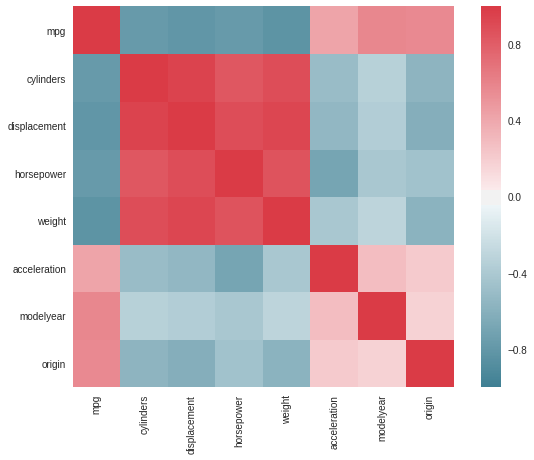

In [30]:
f, ax = plt.subplots(figsize = (10,7))
correlation = Regression_Data.corr()
sns.heatmap(correlation, mask=np.zeros_like(correlation, dtype=np.bool), 
            cmap = sns.diverging_palette(220, 10, as_cmap=True), square=True, ax = ax)
plt.show()


# Data

In [31]:
df_x = Regression_Data.drop(['mpg'], axis = 1)

df_y = Regression_Data.drop(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'modelyear',
                             'origin'], axis = 1)

## Train and Test Data

In [32]:
df_x_train = df_x.iloc[:-20]
df_y_train = df_y.iloc[:-20]

df_x_test = df_x.iloc[80:]
df_y_test = df_y.iloc[80:]
#df_y_train.head()

## Linear Regression

## Intercept and coefficients by taking all features

In [33]:
reg = linear_model.LinearRegression()
reg.fit(df_x_train,df_y_train)
coefficients = reg.coef_.tolist()
intercept = reg.intercept_.tolist()

In [34]:
mean_square_error = np.mean((reg.predict(df_x_test) - df_y_test)**2)
mean_square_error

mpg    12.082416
dtype: float64

In [35]:
variance = reg.score(df_x_test, df_y_test)
variance

0.80142031489089549

# Scatter Plot

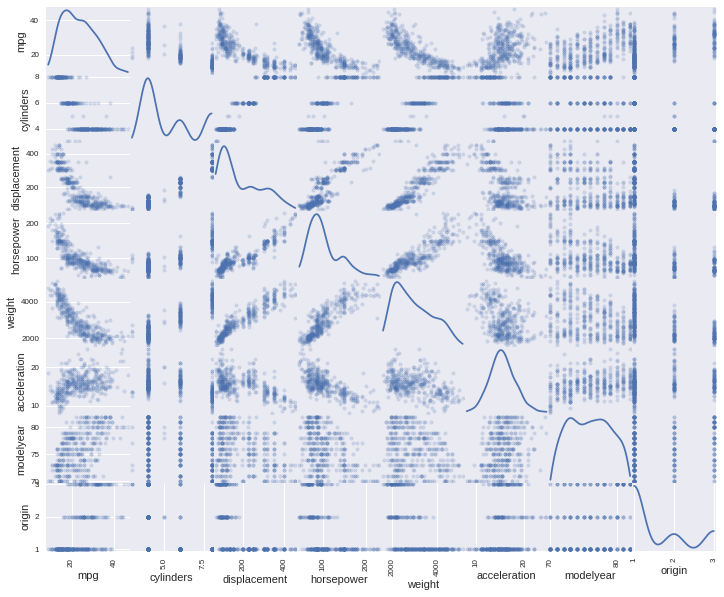

In [36]:
pd.scatter_matrix(Regression_Data, alpha=.2, figsize=(12,10), diagonal='kde')
plt.show()

# Feature Selection

## Ridge Regression

In [39]:
alphas = 10**(np.linspace(-5,0,100))
Ridge_df = pd.DataFrame()
model = Ridge()
coeff =  []
for a in alphas:
    model.set_params(alpha = a)
    model.fit(df_x_train, df_y_train)
    coeff.append(model.coef_)
    df = pd.DataFrame({'cylinders':[model.coef_[0][0]],'displacement':[model.coef_[0][1]],
                       'horsepower':[model.coef_[0][2]],'weight':[model.coef_[0][3]],'acceleration':[model.coef_[0][4]]
                      ,'modelyear': [model.coef_[0][5]], 'origin':[model.coef_[0][5]]})
    Ridge_df = Ridge_df.append(df)

In [40]:
trace0 = Scatter(
    x = alphas,
    y = Ridge_df['cylinders'],
    name = 'cylinders',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
    )
trace1 = Scatter(
    x = alphas,
    y = Ridge_df['displacement'],
    name = 'displacement',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4)
)
trace2 = Scatter(
    x = alphas,
    y = Ridge_df['horsepower'],
    name = 'horsepower',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = Scatter(
    x = alphas,
    y = Ridge_df['weight'],
    name = 'weight',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = Scatter(
    x = alphas,
    y = Ridge_df['acceleration'],
    name = 'acceleration',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace5 = Scatter(
    x = alphas,
    y = Ridge_df['modelyear'],
    name = 'modelyear',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace6 = Scatter(
    x = alphas,
    y = Ridge_df['origin'],
    name = 'origin',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)


data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

layout = dict(xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data = data, layout = layout)
plot.iplot(fig, filename='RidgeRegression.html')

In [41]:
ridge2 = Ridge(alpha=0.005, normalize=True)
ridge2.fit(df_x_train, df_y_train.mpg) # Fit a ridge regression on the training data
pred2 = ridge2.predict(df_x_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=df_x_train.columns)) # Print coefficients
print(mean_squared_error(df_y_test, pred2)) # Calculate the test MSE

cylinders      -0.404303
displacement    0.012653
horsepower     -0.015962
weight         -0.005859
acceleration    0.033327
modelyear       0.710995
origin          1.411936
dtype: float64
12.1475523676


In [42]:
ridge2 = Ridge(alpha=0.1, normalize=True)
ridge2.fit(df_x_train, df_y_train.mpg) # Fit a ridge regression on the training data
pred2 = ridge2.predict(df_x_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=df_x_train.columns)) # Print coefficients
print(mean_squared_error(df_y_test, pred2)) # Calculate the test MSE

cylinders      -0.414709
displacement   -0.004590
horsepower     -0.026504
weight         -0.003435
acceleration   -0.069314
modelyear       0.616528
origin          1.306137
dtype: float64
13.1882351277


In [43]:
ridgecv = RidgeCV(alphas=alphas, scoring='mean_squared_error', normalize=True)
ridgecv.fit(df_x_train, df_y_train)
ridgecv.alpha_

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_

0.0047508101621027985

## Lasso

In [44]:
Lasso_df = pd.DataFrame()
coeff  = []
lasso = Lasso(max_iter = 10000, normalize = True)
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(df_x_train, df_y_train)
    coeff.append(model.coef_)
    df_new = pd.DataFrame({'cylinders':[model.coef_[0][0]],'displacement':[model.coef_[0][1]],
                       'horsepower':[model.coef_[0][2]],'weight':[model.coef_[0][3]],'acceleration':[model.coef_[0][4]]
                      ,'modelyear': [model.coef_[0][5]], 'origin':[model.coef_[0][5]]})
    Lasso_df = Lasso_df.append(df_new)


In [45]:
trace0 = Scatter(
    x = alphas,
    y = Lasso_df['cylinders'],
    name = 'cylinders',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
    )
trace1 = Scatter(
    x = alphas,
    y = Lasso_df['displacement'],
    name = 'displacement',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4)
)
trace2 = Scatter(
    x = alphas,
    y = Lasso_df['horsepower'],
    name = 'horsepower',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = Scatter(
    x = alphas,
    y = Lasso_df['weight'],
    name = 'weight',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = Scatter(
    x = alphas,
    y = Lasso_df['acceleration'],
    name = 'acceleration',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace5 = Scatter(
    x = alphas,
    y = Lasso_df['modelyear'],
    name = 'modelyear',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace6 = Scatter(
    x = alphas,
    y = Lasso_df['origin'],
    name = 'origin',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)


data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

layout = dict(xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data = data, layout = layout)
plot.iplot(fig, filename='LassoRegression.html')

In [46]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(df_x_train, df_y_train.mpg)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(df_x_train, df_y_train.mpg)
mean_squared_error(df_y_test.mpg, lasso.predict(df_x_test))

12.117068175135934

In [47]:
pd.Series(lasso.coef_, index=df_x_test.columns)

cylinders      -0.373171
displacement    0.013365
horsepower     -0.013110
weight         -0.006109
acceleration    0.050027
modelyear       0.717289
origin          1.396024
dtype: float64

In [138]:
# from this we can see that we can easily omit displacement, horsepower, weight,acceleration

# Model Selection

## Model1

In [76]:
model_4 = sm.ols(formula = "mpg ~ cylinders + displacement + weight + acceleration +horsepower ", data = Regression_Data[:80]).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     95.14
Date:                Sun, 02 Apr 2017   Prob (F-statistic):           8.62e-31
Time:                        17:54:48   Log-Likelihood:                -175.00
No. Observations:                  80   AIC:                             362.0
Df Residuals:                      74   BIC:                             376.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       39.1150      2.862     13.669      0.000      33.413      44.817
cylinders       -0.5095      0.496     -1.027      0.308      -1.498       0.479
displacement    -0.0045      0.009     -0.493      0.623      -0.023       0.014
weight          -0.0041      0.001     -5.227      0.000      -0.006      -0.003
acceleration    -0.1161      0.141     -0.822      0.414      -0.398       0.165
horsepower      -0.0089      0.014     -0.619      0.538      -0.038       0.020
==============================================================================
Omnibus:                        6.443   Durbin-Watson:                   1.245
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                8.013
Skew:                           0.327   Prob(JB):                       0.0182
Kurtosis:                       4.406   Cond. No.                     3.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
y_model_4 = model_4.predict(df_x_test)

## Plot of Predicted Data vs Actual Data 

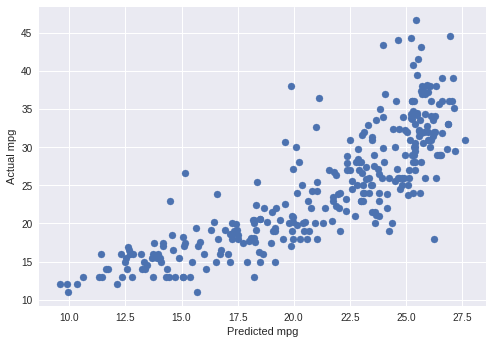

In [78]:
plt.scatter(y_model_4, df_y_test)
plt.xlabel("Predicted mpg")
plt.ylabel("Actual mpg")
plt.show()

In [79]:
#plotly

In [80]:
trace = go.Scatter(
    x=y_model_4,
    y=df_y_test.mpg,
    mode='markers',
    name = 'Predicted vs Original',
    line=dict(shape='linear')
)
trace1 = go.Scatter(
    x= df_y_test.mpg,
    y= df_y_test.mpg,
    mode='lines',
    name = 'x = y',
    line=dict(shape='linear')
)
data = [trace, trace1]
layout = dict(
    legend=dict(
        traceorder='reversed',
        font=dict(size=16)
    )
)
fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='Scatter plot for Normal Regression')

In [81]:
SSE_new = ((y_model_4 - df_y_test.mpg)**2).sum()
mean = df_y_test.mpg.mean()
TSS = ((y_model_4 - mean)**2).sum()
R_Square_new = 1-(SSE_new/TSS)
R_Square_new

-0.05282059803657546

In [82]:
RMSE = (((df_y_test.mpg - mean)**2).sum()) * ((1 - R_Square_new)/100)
RMSE

199.22036358484786

# Box Plot

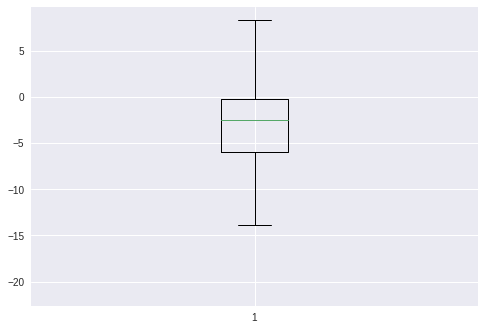

In [83]:
residual_new = np.array(y_model_4 - df_y_test.mpg)
plt.boxplot(residual_new)
plt.show()

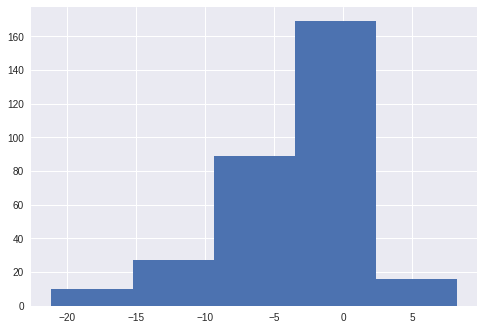

In [84]:
plt.hist(residual_new, bins=5)
plt.show()

In [85]:
# we plot histogram of residuals to check wheater the residuals are following NORAMAL DISTRIBUTION or not.

# Test Hypothesis

In [86]:
name = ['F statistics', 'p_value']
test = sms.het_goldfeldquandt(model_4.resid, model_4.model.exog)
list(zip(name,test))

[('F statistics', 3.2967260086771124), ('p_value', 0.00039212845675150326)]

In [87]:
# to check the p value